In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from rdkit import Chem

# Dataset with smiles format

In [3]:
df_SMILES = pd.read_csv("PI1M_v2.csv")
df_SMILES.head()

,SMILES,SA Score
0,*CCC[Fe]CCCC(=O)OCCCCOCCCNCC(*)=O,4.174851
1,*CCCC1C=CNC2=CC=C2C(*)CCC1,5.939780
2,*CCC*,6.887882
3,*C(=O)CNC(*)C(=O)OCCCCCNC,4.227674
4,*CC(C)(C)CCCCCCC(C)C(=O)N*,4.199197


**Unique values**

In [5]:
df_SMILES.SMILES.unique(), len(df_SMILES.SMILES.unique()), df_SMILES.shape

(array(['*CCC[Fe]CCCC(=O)OCCCCOCCCNCC(*)=O', '*CCCC1C=CNC2=CC=C2C(*)CCC1',
        '*CCC*', ..., '*NC(CC)CC(=O)NCCCCCCNS(*)(=O)=O',
        '*CCN(CCOC(=O)NCCCCCCCCNC(=O)O*)CC(=O)OC',
        '*OP(=O)(Cl)c1ccc(C(O)c2ccc(*)cc2)cc1'], dtype=object),
 995799,
 (995799, 2))

In [6]:
df_SMILES['mol'] = df_SMILES['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 

**Draw molecules**

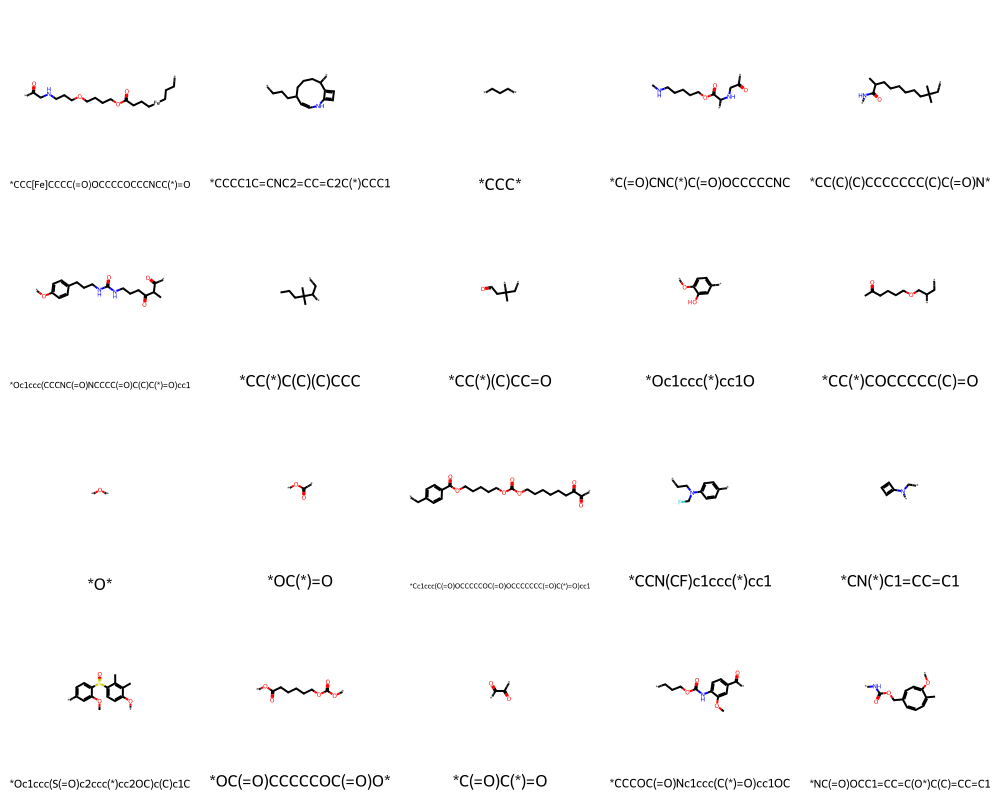

In [7]:
from rdkit.Chem import Draw
mols = df_SMILES['mol'][:20]

Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df_SMILES['SMILES'][:20].values))

**Calculate number of atoms / heavy atoms**

In [8]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1


df_SMILES['mol'] = df_SMILES['mol'].apply(lambda x: Chem.AddHs(x))
df_SMILES['num_of_atoms'] = df_SMILES['mol'].apply(lambda x: x.GetNumAtoms())
df_SMILES['num_of_heavy_atoms'] = df_SMILES['mol'].apply(lambda x: x.GetNumHeavyAtoms())

In [7]:
df_SMILES.head()

,SMILES,SA Score,mol,num_of_atoms,num_of_heavy_atoms
0,*CCC[Fe]CCCC(=O)OCCCCOCCCNCC(*)=O,4.174851,<rdkit.Chem.rdchem.Mol object at 0x000001C2821...,53,22
1,*CCCC1C=CNC2=CC=C2C(*)CCC1,5.939780,<rdkit.Chem.rdchem.Mol object at 0x000001C2821...,36,15
2,*CCC*,6.887882,<rdkit.Chem.rdchem.Mol object at 0x000001C2821...,11,3
3,*C(=O)CNC(*)C(=O)OCCCCCNC,4.227674,<rdkit.Chem.rdchem.Mol object at 0x000001C2821...,35,15
4,*CC(C)(C)CCCCCCC(C)C(=O)N*,4.199197,<rdkit.Chem.rdchem.Mol object at 0x000001C2821...,42,15


In [8]:
df_SMILES.to_csv("PI1M_v2_new.csv")

In [ ]:
# df_smiles = pd.read_csv("PI1M_v2_new.csv")

C:\Users\Denis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


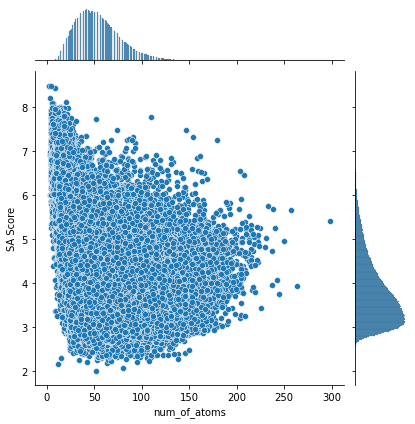

In [9]:
import seaborn as sns
sns.jointplot(df_SMILES.num_of_atoms, df_SMILES["SA Score"])
# sns.jointplot(df_smiles.num_of_atoms, df_smiles["SA Score"])
plt.show()

In [11]:
# First we need to settle the pattern.
c_patt = Chem.MolFromSmiles('C')

# Now let's implement GetSubstructMatches() method
print(df_SMILES['mol'][0].GetSubstructMatches(c_patt))

((1,), (2,), (3,), (5,), (6,), (7,), (8,), (11,), (12,), (13,), (14,), (16,), (17,), (18,), (20,), (21,))


In [12]:
#We're going to settle the function that searches patterns and use it for a list of most common atoms only
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], df_SMILES)

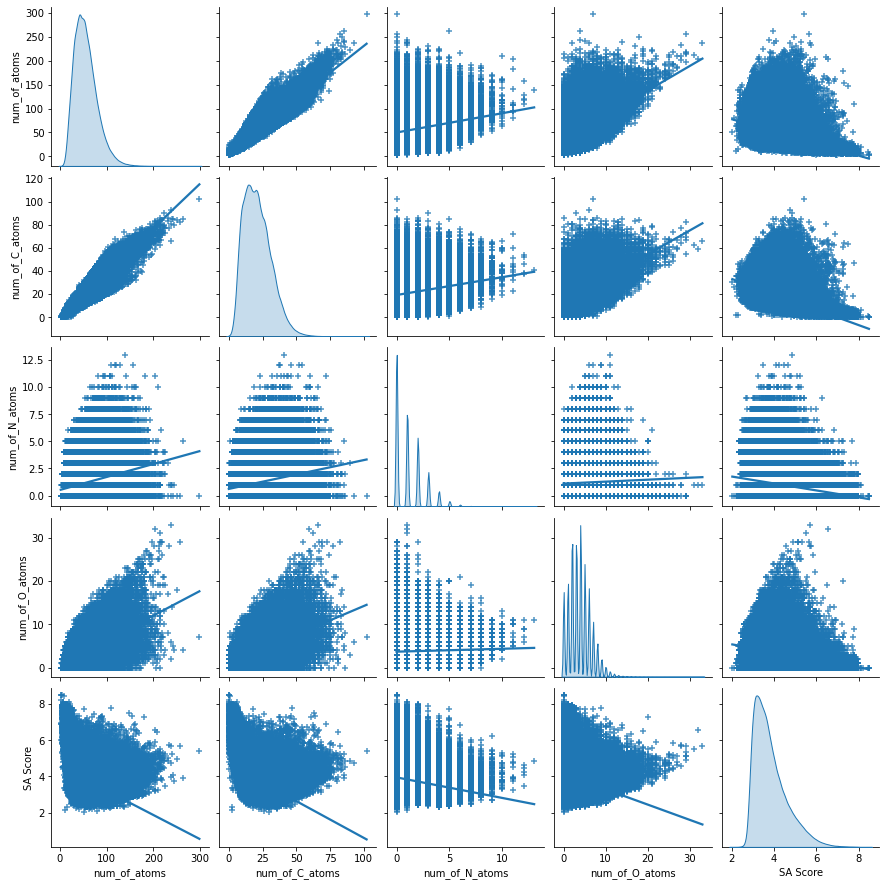

In [13]:
sns.pairplot(df_SMILES[["num_of_atoms","num_of_C_atoms","num_of_N_atoms", "num_of_O_atoms", "SA Score"]], diag_kind='kde', kind='reg', markers='+')
plt.show()

# Dataset with properties of polymers

In [4]:
df_xlsx = pd.read_excel("polyinfo homopolymer.xlsx")
df_xlsx.head()

,polymer_name,polymer_id,cu_formula,property_category,property_name,property_value_median,property_value_variance,property_unit
0,polyethene,P010001,CH2,Physical property,Density,0.9362,0.010564,g/cm3
1,polyethene,P010001,CH2,Physical property,Specific volume,1.073,12.574191,cm3/g
2,polyethene,P010001,CH2,Optical property,Refractive index,1.531,0.00091,NaN
3,polyethene,P010001,CH2,Thermal property,Crystallization kinetics r,79175,122911964.285714,nm/s
4,polyethene,P010001,CH2,Thermal property,Crystallization kinetics k,0.0617,0.58551,NaN


In [14]:
for col in df_xlsx.columns:
    print("Column name is", col)
    print(df_xlsx[col].unique())
    print(len(df_xlsx[col].unique()), '\n')

Column name is polymer_name
['polyethene' 'poly(prop-1-ene)' 'poly(but-1-ene)' ...
 'poly(naphthalene-4,5:8,1-tetrayl)'
 'poly((phenylarsanediyl){1-[(phenylarsanediyl)ethene-1,1,2-triyl-1-(4,1-phenylene)]ethene-1,2-diyl})'
 'poly((phenylarsanediyl){1-[(phenylarsanediyl)ethene-1,1,2-triyl-1-(3,1-phenylene)]ethene-1,2-diyl})']
18312 

Column name is polymer_id
['P010001' 'P010002' 'P010003' ... 'P522077' 'P522078' 'P522079']
18667 

Column name is cu_formula
['CH2' 'C3H6' 'C4H8' ... 'C18H28OSe' 'C7F13NaO5S' 'C22H16As2']
11704 

Column name is property_category
['Physical property' 'Optical property' 'Thermal property'
 'Electric property' 'Physicochemical property' 'Dilute solution property'
 'Tensile property' 'Shear property' 'Flexural property'
 'Compression characteristics' 'Creep characteristics'
 'Heat characteristics' 'Impact strength' 'Hardness'
 'Heat resistance and combustion' 'Other physical property'
 'Polymer Information' 'Rheological property']
18 

Column name is property_

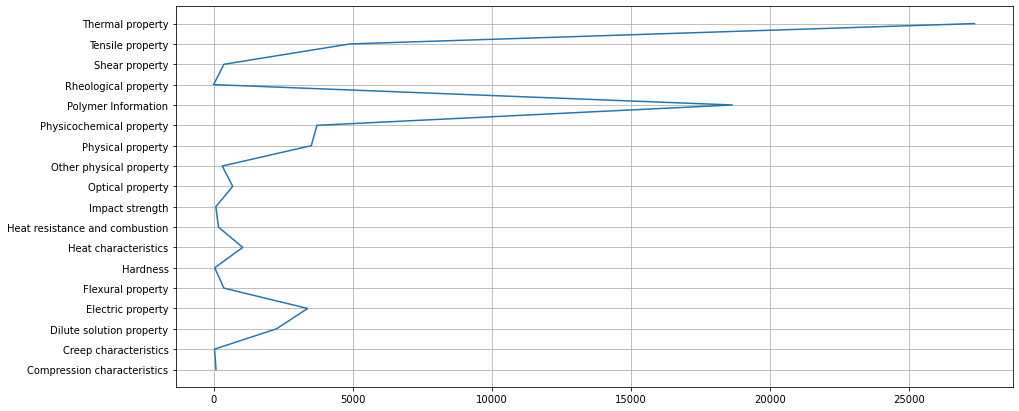

In [72]:
series_for_plot = df_xlsx.groupby("property_category")["property_category"].agg(["count"]).reset_index()

fig, ax = plt.subplots(figsize=(15, 7))

ax.plot(series_for_plot["count"] , series_for_plot["property_category"] )

# plt.xticks(rotation = 90) 
plt.grid()
plt.show()